In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Load Dataset
data = pd.read_csv('StudentsPerformance.csv')

# first few rows of dataset
print("Dataset Overview:")
print(data.head())



Dataset Overview:
   Student ID  Study Hours  Attendance (%)  Exam Score
0           1            5              80          75
1           2           10              90          85
2           3           15              70          65
3           4           12              85          80
4           5            8              60          70


# Preprocessing

In [4]:
# Check for Missing Values
print("\nMissing Values Before Handling:")
print(data.isnull().sum())



Missing Values Before Handling:
Student ID        0
Study Hours       0
Attendance (%)    0
Exam Score        0
dtype: int64


In [5]:
# Impute missing values (if any) with the mean
data['Study Hours'] = data['Study Hours'].fillna(data['Study Hours'].mean())
data['Attendance (%)'] = data['Attendance (%)'].fillna(data['Attendance (%)'].mean())
data['Exam Score'] = data['Exam Score'].fillna(data['Exam Score'].mean())

print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values After Handling:
Student ID        0
Study Hours       0
Attendance (%)    0
Exam Score        0
dtype: int64


# Exploratory Data Analysis (EDA)


In [31]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())




Descriptive Statistics:
       Student ID  Study Hours  Attendance (%)  Exam Score
count  100.000000   100.000000      100.000000   100.00000
mean    50.500000    10.690000       79.350000    80.39000
std     29.011492     3.277394        9.717604     7.10512
min      1.000000     5.000000       60.000000    65.00000
25%     25.750000     8.000000       75.000000    74.00000
50%     50.500000    10.000000       80.000000    80.00000
75%     75.250000    13.000000       87.000000    86.00000
max    100.000000    18.000000       95.000000    94.00000


C:\Users\mos66\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


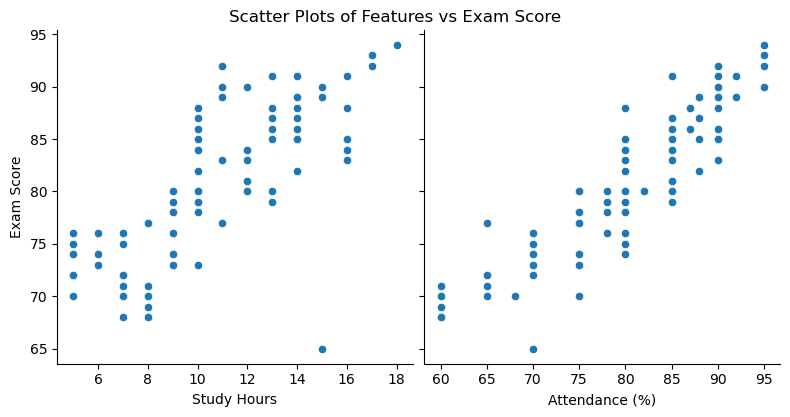

In [32]:
# Scatter Plots
sns.pairplot(data, x_vars=["Study Hours", "Attendance (%)"], y_vars="Exam Score", kind="scatter", height=4)
plt.suptitle("Scatter Plots of Features vs Exam Score", y=1.02)
plt.show()




Correlation Matrix:
                Student ID  Study Hours  Attendance (%)  Exam Score
Student ID        1.000000    -0.068362       -0.081171    0.003553
Study Hours      -0.068362     1.000000        0.680258    0.758278
Attendance (%)   -0.081171     0.680258        1.000000    0.906798
Exam Score        0.003553     0.758278        0.906798    1.000000


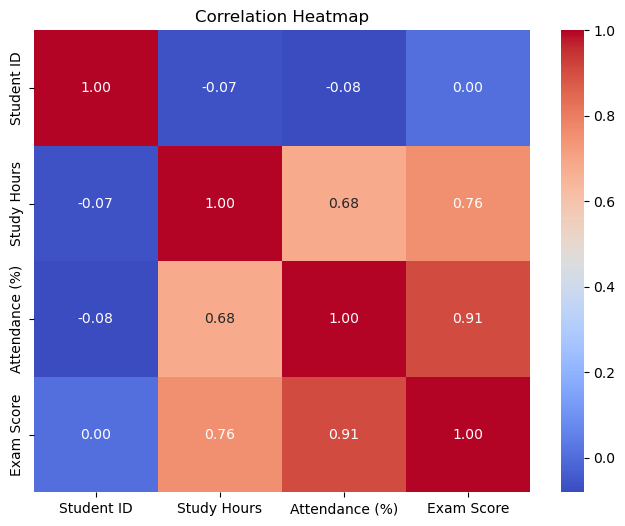

In [33]:
# Correlation Heatmap
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Feature Selection

In [12]:
X = data[["Study Hours", "Attendance (%)"]]
y = data["Exam Score"]


# Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Coefficients

In [15]:
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")



Model Coefficients:
Intercept: 31.361749482032387
Coefficients: [0.47451087 0.55605463]


# Predictions

In [16]:
y_pred = model.predict(X_test)


# Evaluation Metrics


In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")




Evaluation Metrics:
Mean Absolute Error (MAE): 1.9619017376493453
Mean Squared Error (MSE): 5.933324149340108
R-squared (R²): 0.8889930000123459


# Visualization of Actual vs Predicted Values

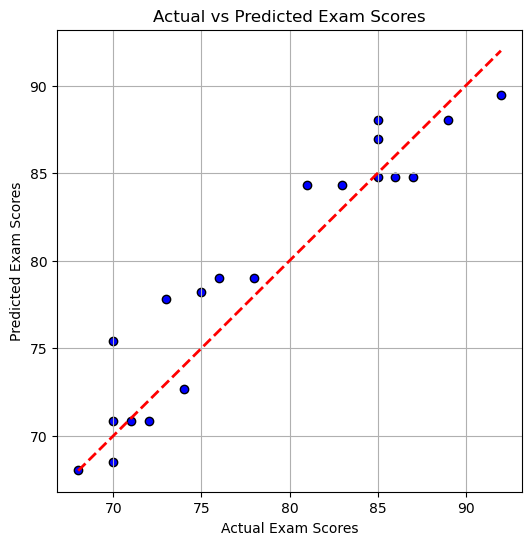

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()